In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from IPython.display import clear_output
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
import os
import sys
pd.options.display.max_rows = 999
pd.set_option('display.float_format', '{:.4f}'.format)


In [2]:
root_dir = os.path.abspath(os.path.join(os.path.dirname('see_all_expewriments.ipynb'), '..'))
os.chdir(root_dir)
sys.path.insert(0, os.path.join(root_dir, 'src'))

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [4]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [5]:
iteration = '2'
root_path = f'./backbone/data/backtest/experiments/{iteration}'
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'


path = 'Mode_train-Model_gradient_boosting-TrainWw_11520-TrainPd_168-TradStgy_ml_strategy-PerFwTg_4-SL_20-RR_5-CloseTime_True-TS_False'
orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [6]:
orders

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,40f268db-3ab7-11ef-9a7b-ff55a332e9ce,AUDUSD,OperationType.BUY,2023-01-04 00:00:00,2023-01-04 04:00:00,0.6726,0.6726,0.6767,20.6000,0.6706,0.6826,5000,0.0041,ClosePositionType.DAYS
1,40ffec6b-3ab7-11ef-afc1-ff55a332e9ce,GBPUSD,OperationType.BUY,2023-01-04 02:00:00,2023-01-04 06:00:00,1.1990,1.1990,1.1991,0.8500,1.1970,1.2090,5000,0.0002,ClosePositionType.DAYS
2,410ba02b-3ab7-11ef-a6c5-ff55a332e9ce,USDCHF,OperationType.SELL,2023-01-04 03:00:00,2023-01-04 07:00:00,0.9334,0.9334,0.9339,-2.9000,0.9354,0.9234,5000,-0.0006,ClosePositionType.DAYS
3,41142f44-3ab7-11ef-908f-ff55a332e9ce,USDCAD,OperationType.SELL,2023-01-04 04:00:00,2023-01-04 08:00:00,1.3642,1.3642,1.3645,-1.7000,1.3662,1.3542,5000,-0.0003,ClosePositionType.DAYS
4,411e30c3-3ab7-11ef-bb9d-ff55a332e9ce,EURUSD,OperationType.BUY,2023-01-04 05:00:00,2023-01-04 09:00:00,1.0569,1.0569,1.0594,12.8085,1.0549,1.0669,5103,0.0025,ClosePositionType.DAYS
5,418301b0-3ab7-11ef-9084-ff55a332e9ce,AUDUSD,OperationType.SELL,2023-01-05 02:00:00,2023-01-05 06:00:00,0.6831,0.6831,0.6814,8.6486,0.6851,0.6731,5148,0.0017,ClosePositionType.DAYS
6,4192a1ed-3ab7-11ef-bc00-ff55a332e9ce,GBPUSD,OperationType.SELL,2023-01-05 04:00:00,2023-01-05 08:00:00,1.2048,1.2048,1.2024,12.5096,1.2068,1.1948,5148,0.0024,ClosePositionType.DAYS
7,419dcce2-3ab7-11ef-ac4f-ff55a332e9ce,USDCHF,OperationType.BUY,2023-01-05 05:00:00,2023-01-05 09:00:00,0.9297,0.9297,0.9287,-4.7362,0.9277,0.9397,5148,-0.0009,ClosePositionType.DAYS
8,41a714b4-3ab7-11ef-b4b0-ff55a332e9ce,EURUSD,OperationType.SELL,2023-01-05 06:00:00,2023-01-05 10:00:00,1.0604,1.0604,1.0620,-8.2553,1.0624,1.0504,5192,-0.0016,ClosePositionType.DAYS
9,41cac016-3ab7-11ef-8045-ff55a332e9ce,USDCAD,OperationType.BUY,2023-01-05 09:00:00,2023-01-05 12:00:00,1.3518,1.3518,1.3498,-10.2453,1.3498,1.3618,5254,-0.0019,ClosePositionType.STOP_LOSS


In [7]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

In [8]:
orders.operation_type.value_counts()

operation_type
OperationType.SELL    203
OperationType.BUY     185
Name: count, dtype: int64

# Compras que salieron bien

In [9]:
orders[(orders['operation_type']=='OperationType.BUY') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.BUY')].shape[0] 

0.6810810810810811

# Ventas que salieron bien

In [10]:
orders[(orders['operation_type']=='OperationType.SELL') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.SELL')].shape[0] 

0.7487684729064039

# Cierres por SL y TP

In [11]:
orders.comment.value_counts()

comment
ClosePositionType.DAYS           328
ClosePositionType.STOP_LOSS       57
ClosePositionType.TAKE_PROFIT      3
Name: count, dtype: int64

In [12]:
# orders[(orders['comment']=='ClosePositionType.DAYS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.DAYS')].shape[0]

# Cierres por SL que terminaron positivos

In [13]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Cierres por SL en que se minimizaron las perdidas

In [14]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Desempenio por ticker

In [15]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
1,EURUSD,49,13,2840.7305,79.0323
0,AUDUSD,36,10,1835.6650,78.2609
2,GBPUSD,39,13,2406.1391,75.0000
5,USDJPY,72,31,5381.2350,69.9029
4,USDCHF,45,21,1878.5756,68.1818
3,USDCAD,37,20,2107.6615,64.9123


# Rendimiento por mes

In [16]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day


orders_per_month_gb = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN
0,2023,1,63,1.0000,20.0000,34.0000,29.0000,0.5400,62.1780,306.9070,1306.9070,0.3070
1,2023,2,60,1.0000,8.0000,44.0000,16.0000,0.7330,79.0000,801.0370,2107.9440,0.6130
2,2023,3,32,0.0000,4.0000,25.0000,7.0000,0.7810,92.9840,465.6900,2573.6350,0.2210
3,2023,4,32,0.0000,3.0000,25.0000,7.0000,0.7810,109.2540,724.5460,3298.1810,0.2820
4,2023,5,20,0.0000,1.0000,17.0000,3.0000,0.8500,103.6800,833.4220,4131.6030,0.2530
5,2023,6,22,0.0000,3.0000,16.0000,6.0000,0.7270,141.1020,785.3450,4916.9480,0.1900
6,2023,7,32,0.0000,7.0000,24.0000,8.0000,0.7500,193.8660,1225.5080,6142.4560,0.2490
7,2023,8,25,0.0000,3.0000,20.0000,5.0000,0.8000,232.8640,1643.3430,7785.8000,0.2680
8,2023,9,33,0.0000,3.0000,21.0000,10.0000,0.6360,408.1800,1439.2350,9225.0340,0.1850


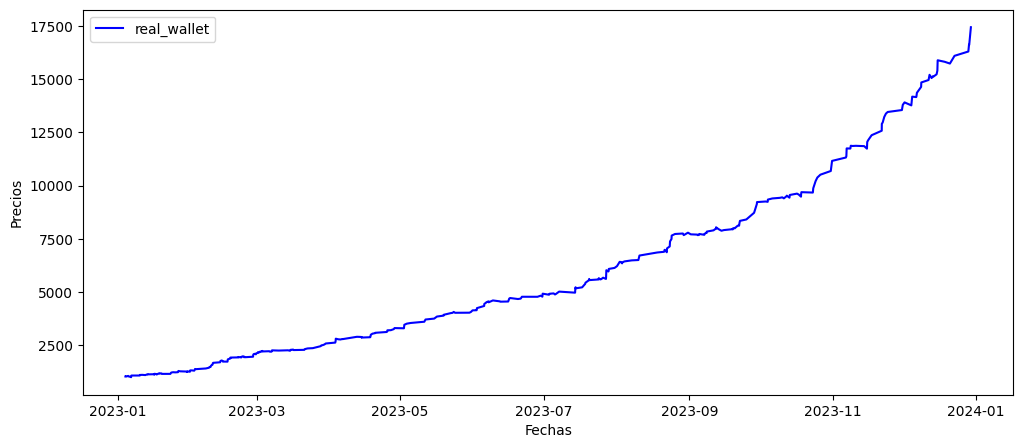

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [18]:
orders_per_month_gb.perc_change.mean()

0.27325000000000005

In [19]:
orders_per_month_gb.perc_change.std()

0.1130471542804554

In [20]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.0000,3000.0000
1,0.3070,3921.0000
2,0.6130,6324.5730
3,0.2210,7722.3036
4,0.2820,9899.9933
5,0.2530,12404.6916
6,0.1900,14761.5829
7,0.2490,18437.2171
8,0.2680,23378.3913
9,0.1850,27703.3937


# Rendimiento por dia

In [21]:
orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==1]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,1,5,0.0000,0.0000,3.0000,2.0000,60.0000,20.6000,29.6590,1029.6580,0.0290
1,2023,1,5,0.0000,1.0000,2.0000,3.0000,40.0000,12.5100,-2.0790,1027.5800,-0.0020
2,2023,1,6,0.0000,4.0000,2.0000,4.0000,33.3330,44.1550,38.5790,1066.1590,0.0360
3,2023,1,4,0.0000,0.0000,3.0000,1.0000,75.0000,21.0940,26.1580,1092.3180,0.0240
4,2023,1,1,0.0000,0.0000,1.0000,0.0000,100.0000,6.8820,6.8820,1099.2000,0.0060
5,2023,1,1,0.0000,1.0000,0.0000,1.0000,0.0000,-11.1020,-11.1020,1088.0980,-0.0100
6,2023,1,2,0.0000,0.0000,1.0000,1.0000,50.0000,43.0300,33.5100,1121.6080,0.0300
7,2023,1,6,0.0000,2.0000,4.0000,2.0000,66.6670,23.1840,27.1250,1148.7340,0.0240
8,2023,1,4,0.0000,3.0000,1.0000,3.0000,25.0000,18.8440,-14.9390,1133.7950,-0.0130
9,2023,1,3,0.0000,1.0000,2.0000,1.0000,66.6670,35.8280,27.9510,1161.7460,0.0240


In [22]:
# ticker = 'EURUSD'
# date_from = datetime(2022,1,1)
# date_to = date_from + timedelta(days=30)

# while date_to < datetime(2024,1,1):
#     date_from_str = date_from.strftime('%Y-%m-%d')
#     date_to_str = date_to.strftime('%Y-%m-%d')

#     historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
#     historical_prices = historical_prices[
#         (historical_prices['Date']>date_from_str)
#         & (historical_prices['Date']<date_to_str)
#     ]
    
#     plt.figure(figsize=(14, 7))
#     plt.plot(historical_prices['Date'], historical_prices['Close'], label=f'{ticker} Price', color='blue')
    
#     # Añadir las operaciones de compra y venta
#     buy_trades = orders[
#         (orders['operation_type']=='OperationType.BUY') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
#     sell_trades = orders[
#         (orders['operation_type']=='OperationType.SELL') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
    
#     # Graficar las operaciones de compra
#     plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
#     plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
#     # Graficar las operaciones de venta
#     plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
#     plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
#     # Añadir etiquetas y leyenda
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title(f'{ticker} Price with Buy/Sell Trades')
#     plt.legend()
    
#     # Mostrar el gráfico
#     plt.show()
    
#     print(date_from_str, date_to_str)
   
#     a = input()
    
#     clear_output(wait=True)

#     date_from += timedelta(days=7)
#     date_to = date_from + timedelta(days=15)


In [23]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

take_profit  stop_loss   profit  tp_cumsum  sl_cumsum  \
year month day                                                          
2023 1     4              0          0  29.6585          0          0   
           5              0          1  -2.0786          0          1   
           6              0          4  38.5794          0          5   
           10             0          0  26.1584          0          5   
           11             0          0   6.8821          0          5   
           12             0          1 -11.1019          0          6   
           13             0          0  33.5104          0          6   
           16             0          2  27.1252          0          8   
           17             0          3 -14.9390          0         11   
           18             0          1  27.9510          0         12   
           19             0          2 -17.9466          0         14   
           23             0          0  61.7714          0         14   
           24             0          0  16.5000          0         14   
           25             0          1  -6.3779          0         15   
           26             0          0  66.2077          0         15   
           27             0          1 -16.5819          0         16   
           30             0          3  -5.2797          0         19   
           31             1          1  46.8688          1         20   
     2     1              0          0   0.6535          0          0   
           2              0          1  65.8317          0          1   
           3              0          0  -6.4170          0          1   
           7              0          0  31.9084          0          1   
           8              0          0  55.3931          0          1   
           9              0          0 101.5050          0          1   
           10             1          0 108.5334          1          1   
           13             0          0  89.5448          1          1   
           14             0          3 -32.6120          1          4   
           15             0          0   1.8933          1          4   
           16             0          0 102.3013          1          4   
           17             0          0  86.2502          1          4   
           21             0          0  25.7110          1          4   
           22             0          1  10.0485          1          5   
           23             0          2   0.3437          1          7   
           24             0          1 -19.4000          1          8   
           27             0          0 147.5068          1          8   
           28             0          0  32.0412          1          8   
     3     1              0          0  60.6881          0          0   
           2              0          0  19.8125          0          0   
           3              0          1  11.4868          0          1   
           6              0          1 -11.4200          0          2   
           7              0          0  62.3046          0          2   
           10             0          0 -10.1700          0          2   
           14             0          0  13.4400          0          2   
           15             0          1  20.9770          0          3   
           16             0          1 -10.8563          0          4   
           21             0          0  44.5173          0          4   
           22             0          0  32.8900          0          4   
           24             0          0  12.9870          0          4   
           28             0          0 130.5547          0          4   
           29             0          0  41.8557          0          4   
           30             0          0  46.6231          0          4   
     4     3              0          0 225.8417          0          0   
           4              0          1 -28.4139          0          1   
 

# Que hubiera pasado si no se operaba con algunos tickers?

In [24]:
# tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
# print(tickers_permitidos)

tickers_permitidos = [
    'EURUSD', 
    'GBPUSD', 
    # 'USDJPY', 
    'USDCAD', 
    'AUDUSD', 
    'USDCHF'
]

orders_min = orders_per_month[orders_per_month['ticker'].isin(tickers_permitidos)].copy().reset_index()

# Rendimiento por mes

In [25]:
orders_per_month_gb = orders_min.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
17,2023,2,1,0.0000,0.0000,1.0000,0.0000,100.0000,0.6540,0.6540,1264.1160,0.0010
18,2023,2,4,0.0000,1.0000,3.0000,1.0000,75.0000,40.3920,65.8320,1329.9480,0.0490
19,2023,2,3,0.0000,0.0000,2.0000,1.0000,66.6670,32.4660,29.3240,1359.2720,0.0220
20,2023,2,2,0.0000,0.0000,2.0000,0.0000,100.0000,35.2500,54.7630,1414.0350,0.0390
21,2023,2,4,0.0000,0.0000,4.0000,0.0000,100.0000,26.2330,62.7420,1476.7770,0.0420
22,2023,2,2,0.0000,0.0000,2.0000,0.0000,100.0000,18.5140,29.5330,1506.3100,0.0200
23,2023,2,4,0.0000,0.0000,4.0000,0.0000,100.0000,49.8490,89.5450,1595.8550,0.0560
24,2023,2,2,0.0000,2.0000,0.0000,2.0000,0.0000,-17.5680,-35.4920,1560.3630,-0.0230
25,2023,2,1,0.0000,0.0000,1.0000,0.0000,100.0000,1.8930,1.8930,1562.2560,0.0010
26,2023,2,7,0.0000,0.0000,4.0000,3.0000,57.1430,37.4140,109.6110,1671.8680,0.0660


In [26]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [27]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
1,EURUSD,49,13,2840.7305,0.7903
0,AUDUSD,36,10,1835.6650,0.7826
2,GBPUSD,39,13,2406.1391,0.7500
4,USDCHF,45,21,1878.5756,0.6818
3,USDCAD,37,20,2107.6615,0.6491


In [28]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

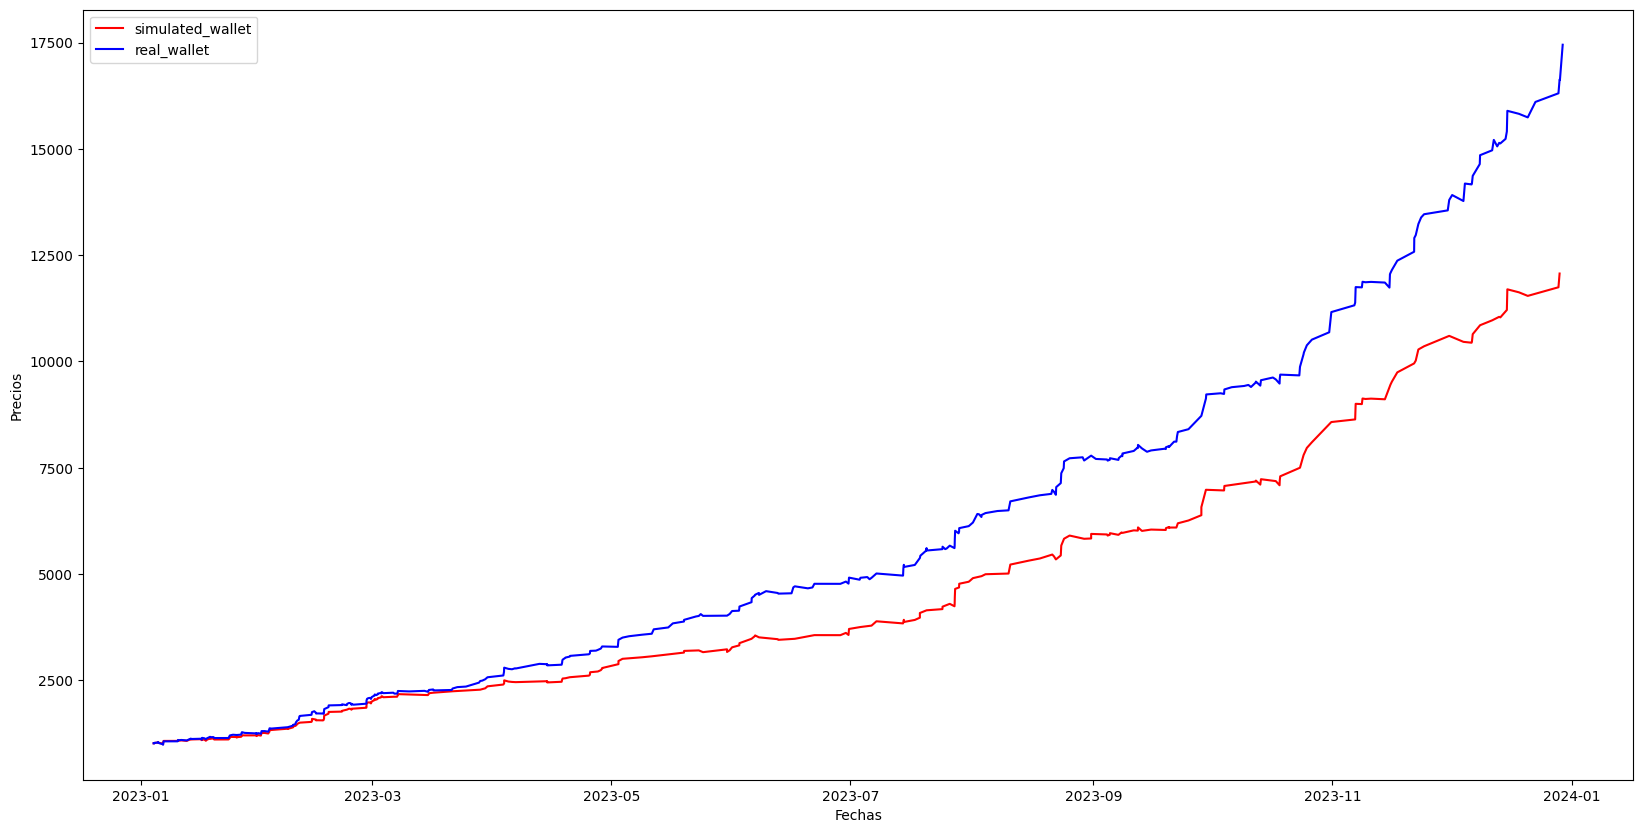

In [29]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [30]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [31]:
true_values

,precision,recall,f1
0,0.6264,0.6087,0.5995
1,0.6273,0.5905,0.5649
2,0.6240,0.5864,0.5590
3,0.6210,0.5839,0.5565
4,0.6215,0.5772,0.5462
5,0.6220,0.5657,0.5203
6,0.6171,0.5776,0.5483
7,0.6237,0.5741,0.5358
8,0.6082,0.5758,0.5497
9,0.6256,0.6190,0.6107


In [32]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report

precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

0.53304497977994
0.5295336787564767
0.52551557256456


              precision    recall  f1-score   support

         0.0       0.52      0.62      0.57       472
         1.0       0.55      0.44      0.49       493

    accuracy                           0.53       965
   macro avg       0.53      0.53      0.53       965
weighted avg       0.53      0.53      0.53       965

Confusion Matrix
[[295 177]
 [277 216]]


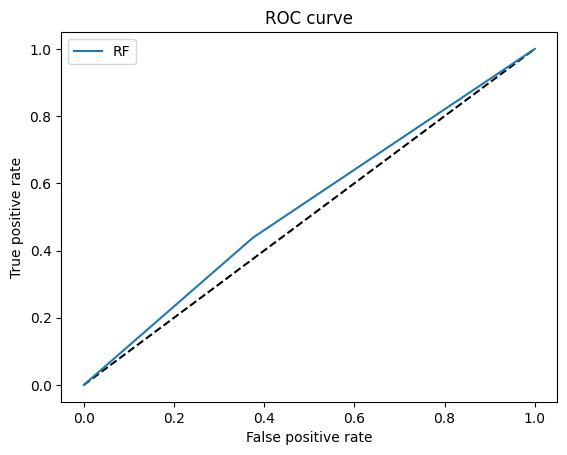

In [33]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [35]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

,ticker,date,y_true,y_pred,proba,binary_pred
0,EURUSD,2023-01-02 13:00:00,1.0000,0.0000,0.5080,0.4920
1,EURUSD,2023-01-04 05:00:00,0.0000,1.0000,0.5107,0.5107
2,EURUSD,2023-01-05 06:00:00,1.0000,1.0000,0.5190,0.5190
3,EURUSD,2023-01-06 11:00:00,1.0000,1.0000,0.5472,0.5472
4,EURUSD,2023-01-10 14:00:00,0.0000,0.0000,0.5090,0.4910
5,EURUSD,2023-01-10 23:00:00,1.0000,0.0000,0.5971,0.4029
6,EURUSD,2023-01-13 13:00:00,0.0000,1.0000,0.5058,0.5058
7,EURUSD,2023-01-16 02:00:00,0.0000,1.0000,0.5475,0.5475
8,EURUSD,2023-01-16 08:00:00,0.0000,1.0000,0.5143,0.5143
9,EURUSD,2023-01-18 08:00:00,1.0000,1.0000,0.5061,0.5061


<Axes: >

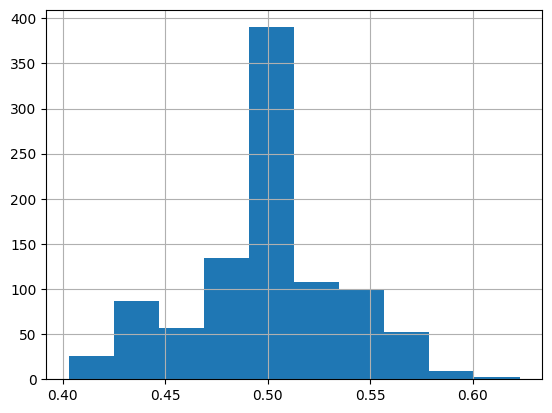

In [36]:
predictions.binary_pred.hist()

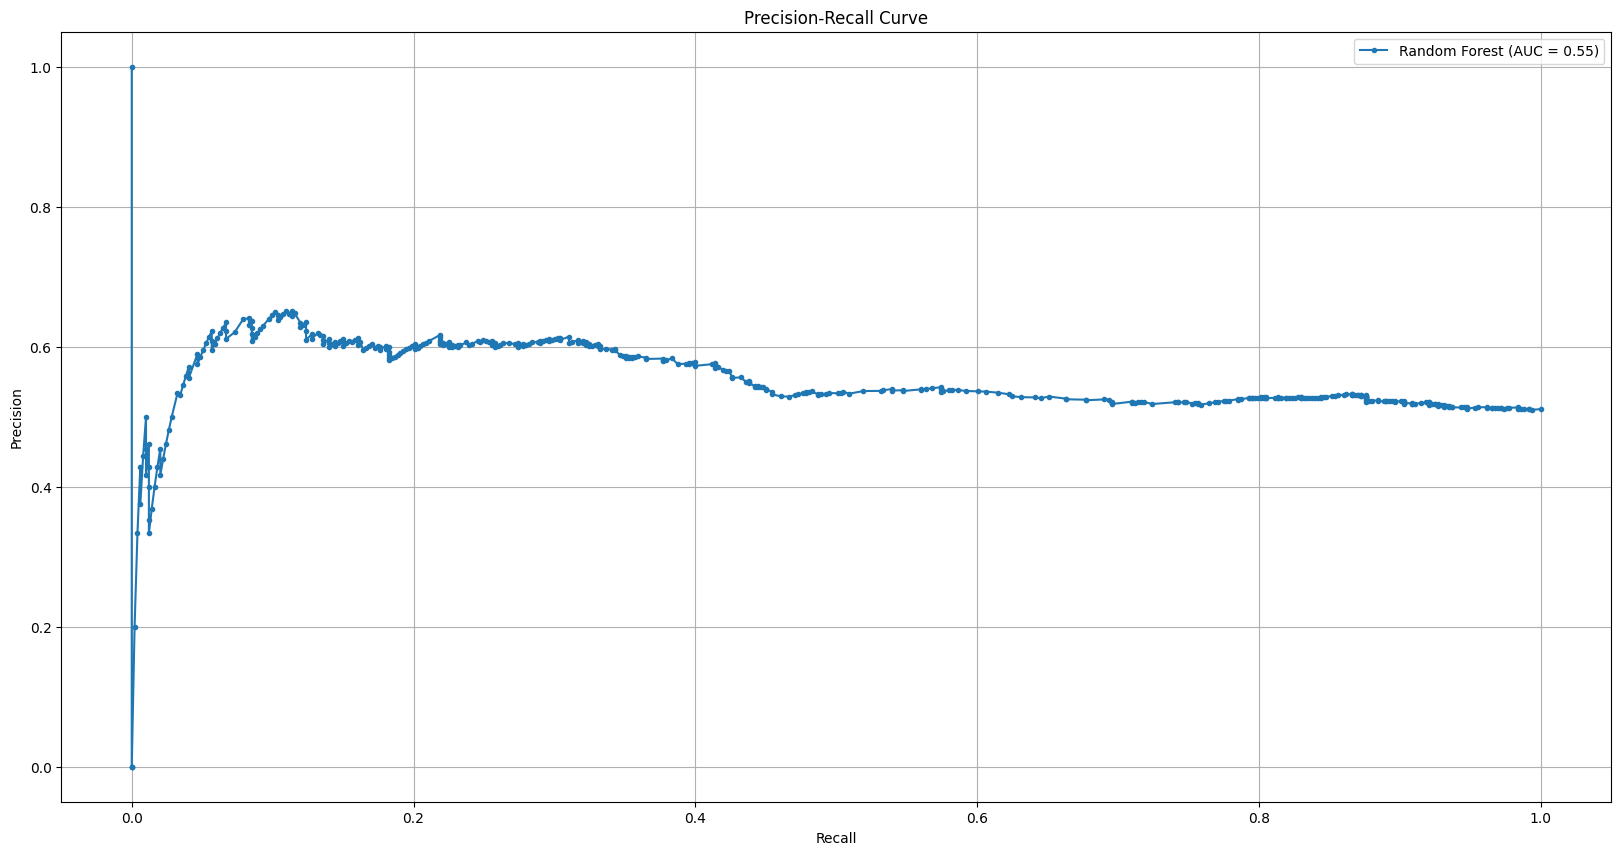

In [37]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [50]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold_fbeta(y_true, y_proba, beta=0.01):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calcular F-beta scores
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    
    # Evitar división por cero y resultados nan
    fbeta_scores = np.nan_to_num(fbeta_scores)
    
    # Encontrar el umbral que maximiza el F-beta score
    index = np.argmax(fbeta_scores)
    best_threshold = thresholds[index]
    best_precision = precision[index]
    best_recall = recall[index]
    best_fbeta = np.max(fbeta_scores)
    
    return best_threshold, best_precision, best_recall, best_fbeta



In [58]:
find_best_threshold_fbeta(predictions['y_true'], predictions['binary_pred'], beta=0.4)

C:\Users\SaidJ\AppData\Local\Temp\ipykernel_20548\238618507.py:8: RuntimeWarning: invalid value encountered in divide
  fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)


(0.4678246016222558,
 0.5324189526184538,
 0.8661257606490872,
 0.5623013350286078)

In [55]:
threshold = 0.5
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

              precision    recall  f1-score   support

         0.0       0.52      0.62      0.57       472
         1.0       0.55      0.44      0.49       493

    accuracy                           0.53       965
   macro avg       0.53      0.53      0.53       965
weighted avg       0.53      0.53      0.53       965



In [41]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

def get_xgboost_feature_importance_from_stacking(pipeline):
    """
    Obtiene la importancia de las características del XGBClassifier dentro de un StackingClassifier.

    Parameters:
    pipeline (Pipeline): Un objeto pipeline de sklearn entrenado que contiene un StackingClassifier.

    Returns:
    dict: Un diccionario donde las claves son los nombres de las características y los valores son su importancia.
    """
    if not isinstance(pipeline, Pipeline):
        raise ValueError("El parámetro debe ser un objeto de tipo Pipeline de sklearn.")

    # Intentar obtener el último estimador del pipeline
    final_estimator = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Comprobar si el estimador final es un StackingClassifier
    if not isinstance(final_estimator, StackingClassifier):
        raise ValueError("El estimador final del pipeline no es un StackingClassifier.")
    
    # Obtener el ProbabilityTransformer del stack
    prob_transf = final_estimator.named_estimators_['prob_transf']
    
    # Obtener el modelo XGBClassifier dentro del ProbabilityTransformer
    xgb_model = prob_transf.model
    
    # Comprobar si el XGBClassifier tiene el atributo feature_importances_
    if not hasattr(xgb_model, 'feature_importances_'):
        raise ValueError("El XGBClassifier no tiene el atributo feature_importances_.")

    importances = xgb_model.feature_importances_

    # Obtener los nombres de las características
    first_transformer = pipeline.named_steps[list(pipeline.named_steps.keys())[0]]
    if hasattr(first_transformer, 'get_feature_names_out'):
        feature_names = first_transformer.get_feature_names_out()
    else:
        feature_names = pipeline['preprocessor'].get_feature_names_out()  # Ajustar según el nombre de tu primer paso

    return dict(zip(feature_names, importances))

In [42]:
pipeline_path = os.path.join(root_path, path, 'pipe.pkl')

In [43]:
import joblib

with open(pipeline_path, 'rb') as file:
    pipeline = joblib.load(file)

features = get_xgboost_feature_importance_from_stacking(pipeline)
features_df = pd.DataFrame({'feature':features.keys(), 'importance':features.values()})
features_df.sort_values(by='importance', ascending=False)

,feature,importance
15,macd,0.2206
6,rsi,0.2008
0,Volume,0.1401
29,hour,0.1080
25,change_percent_3_day,0.0995
10,lower_bband,0.0957
40,side,0.0837
13,mfi,0.0517
7,rsi_flag,0.0000
33,engulfing,0.0000


In [44]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

KeyError: 'fecha'

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()